<a href="https://colab.research.google.com/github/phi1z/1yanagiLab/blob/main/LogNormDist_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 対数正規分布のグラフを作成すプログラムです

## 1.値の設定
データの個数(`N_Data`)、x軸の最小値(`x_min`)-最大値(`x_max`)を入力して下さい。
次に分布の平均(`mu`)と分布の標準偏差(`sigma`)を代入してください。
ただし平均は指数でないこと($\mathrm{mu} \neq e^\mu$)に注視して下さい。

**値を設定したら、実行ボタン(〇の中に▷)を押して下さい**
　　※値が反映されません

## 2.グラフの設定
グラフの名前(`Title`)、サンプル名(`sample_name`)、x軸の名前(`X_label`)、y軸の名前(`Y_label`)、線の色(`color`)、線のスタイル(`line_style`)を指定してください。線の色は色の頭文字です。
また、`X_scale_is_log`にチェックを入れると、$x$軸が対数スケールになります。$y$軸も同様です。

**実行ボタン(〇の中に▷)で、下にグラフが表示されます**

※ $x$軸を対数スケールにするとデータの感覚も自動で対数になります。

## 3.データの保存
左のフォルダーのマークを押すと、LogNormDist_{サンプル名}の画像ファイルが生成されます。.pdfと.pngがあるので、好きな方をローカル環境に保存してください

## 4.さらに細かい設定
グラフの設定の左にある(>)ボタンを押すと、
プログラムが編集できます。さらに細かい設定をする場合は自分でお願いします。

In [4]:
#@title 平均値と分散から逆推定

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
from scipy import integrate
from scipy import optimize

def solve_mu_sigma(ave, std):
  C = (std / ave)**2
  sigma = np.sqrt(np.log(C+1))
  mu = np.log(ave) - (sigma**2) / 2
  return mu, sigma

AVERAGE = 37.23 #@param {type:"number"}
STDEV = 2.04 #@param {type:"number"}
print(f'AVERAGE = {AVERAGE}, STDEV = {STDEV}')
print('-'*45)
mu, sigma = solve_mu_sigma(AVERAGE, STDEV) # Adjusted initial guess
print('-'*45)

print(f'mu = {mu:.3f}, sigma = {sigma:.4f}')

AVERAGE = 37.23, STDEV = 2.04
---------------------------------------------
---------------------------------------------
mu = 3.616, sigma = 0.0548


N = 1000, x is from 1 to 100
AVERAGE = 37.23, STDEV = 2.04, ALL = 1.00


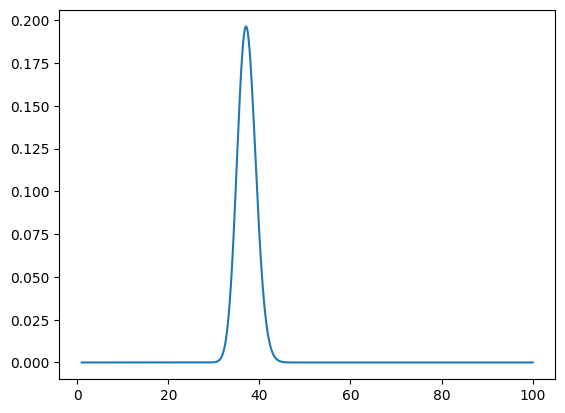

In [ ]:
#@title 値の設定

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
from scipy import integrate

def lognorm_pdf(x, mu=0, sigma=1):
  alpha = 1 / (x * sigma * np.sqrt(2 * np.pi))
  y = (np.log(x) - mu)
  return alpha * np.exp(-y**2 / (2 * sigma**2))

N_Data = 1000 #@param {type:"number"}
x_min = 1 #@param {type:"number"}
x_max = 100 #@param {type:"number"}
x_values = np.linspace(x_min, x_max, 1000)
y_values = lognorm_pdf(x_values, mu, sigma)
this_sum = integrate.simpson(y=y_values, x=x_values)
this_ave = integrate.simpson(y=y_values*x_values, x=x_values)
this_std = np.sqrt(integrate.simpson(y=y_values*(x_values-this_ave)**2, x=x_values))

print(f'N = {N_Data}, x is from {x_min} to {x_max}')
print(f'AVERAGE = {this_ave:.2f}, STDEV = {this_std:.2f}, ALL = {this_sum:.2f}')

plt.plot(x_values, y_values)
plt.show()

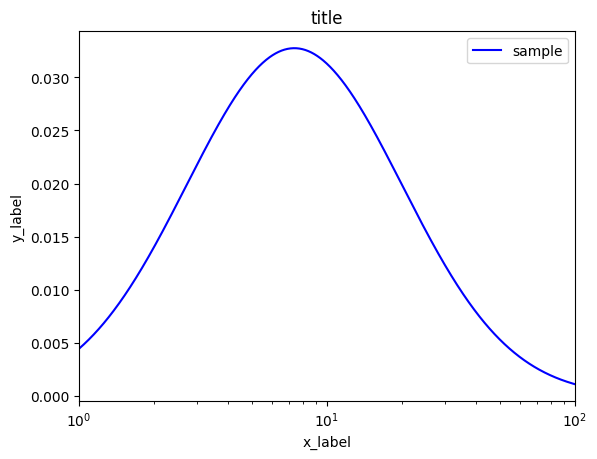

In [ ]:
#@title グラフの設定

Title = "title" #@param {type:"string"}
sample_name = "sample" #@param {type:"string"}
X_label = "x_label" #@param {type:"string"}
Y_label = "y_label" #@param {type:"string"}

X_scale_is_log = True #@param {type:"boolean"}
Y_scale_is_log = False #@param {type:"boolean"}

# Set x-axis to logarithmic scale
if X_scale_is_log:
  x_values = np.logspace(np.log10(x_min), np.log10(x_max), N_Data)
  y_values = lognorm_pdf(x_values, mu, sigma)
  plt.xscale('log')

if Y_scale_is_log:
  plt.yscale('log')

Color = "b" #@param ["r", "g", "b", "c", "m", "y", "k", "w"] {allow-input: true}
Line_style = "-" #@param ["-", "--", "-.", ":"] {allow-input: true}

plt.title(Title)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.xlim(x_min, x_max)

plt.plot(x_values, y_values, color=Color, ls = Line_style, label=sample_name) # Plot the data

# Add legend
plt.legend()

# Save the graph
plt.savefig("LogNormDist_"+sample_name+".png", dpi=300)
plt.savefig("LogNormDist_"+sample_name+".pdf")

# Display the graph
plt.show()


